** Préambule ** L'objectif de ce TP est de mettre en pratique quelques algorithmes de reconstruction d'image. Pour ce faire, nous nous intéressons à des variantes d'un algorithme dit de factorisation non-négative, où l'on cherche à approcher au mieux une matrice en un produit de deux matrices de rang faible à éléments non-négatifs. 

** NB ** Il vous est demandé d'insérer vos commentaires et codes ** uniquement ** dans ce fichier et de le sauvegarder sous la forme TP_2_nom1_nom2.ipynb. Cela produira automatiquement votre compte-rendu de ce TP. 

In [1]:
# Chargement des packages nécessaires
using Images, Colors, StatsBase
# Cette étape est à réaliser deux fois consécutivement avant de s'attaquer au reste du TP

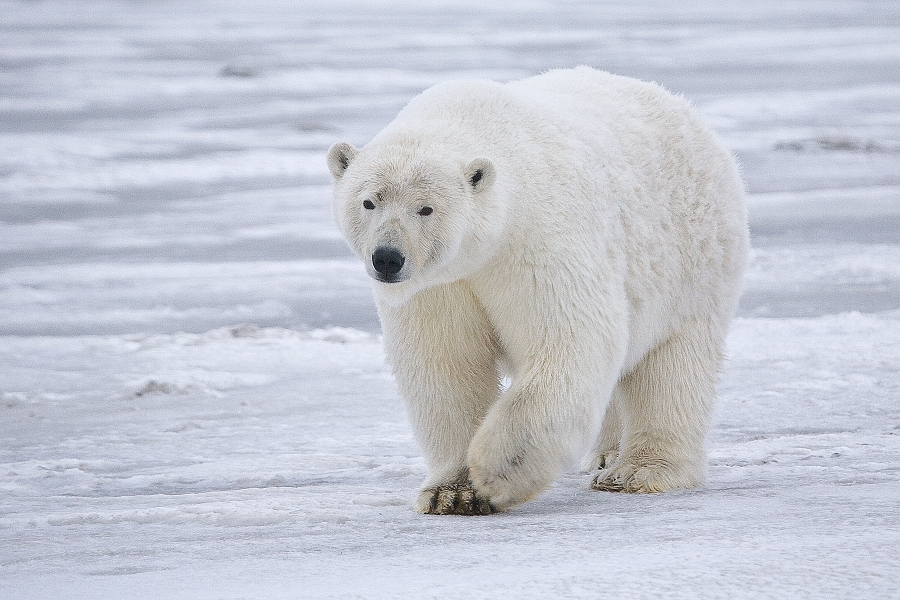

In [2]:
# Chargement de l'image test parmi polar_bear.jpg 
imgc  = load("polar_bear.jpg")

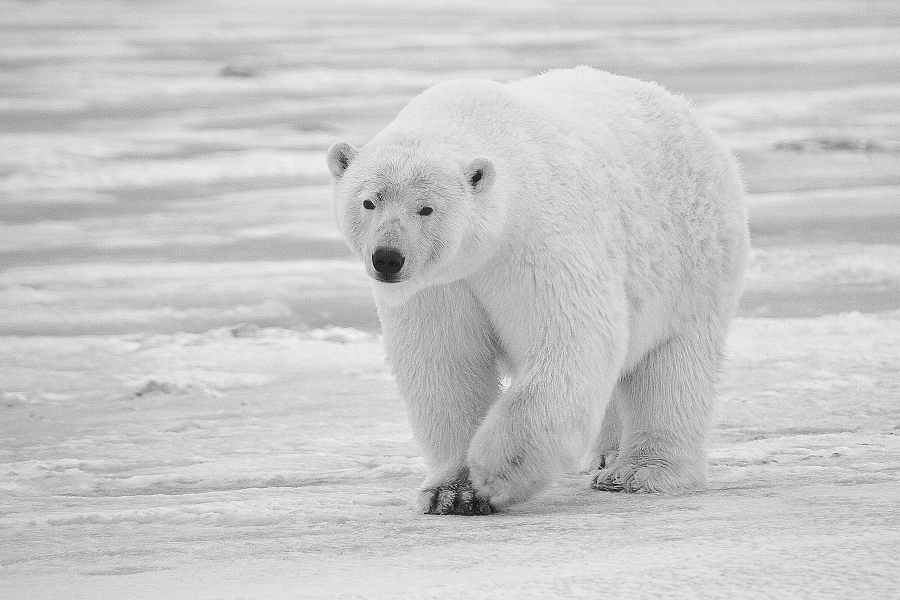

In [58]:
# Si le TP est réalisé sur la Juliabox
#imgc=imgc[100:300,200:500];

img   = convert(Array{Gray},imgc);   # Conversion de l'image en niveau de gris
M     = Float32.(img);  # M est la matrice des niveaux de gris
imhsv = colorview(Gray, float(M));     # Affichage
tmp2 = @view imhsv[:,:]

In [93]:
#
# Paramètres utiles par la suite
#
m     = size(M,1);
n     = size(M,2);
erank = 150;        # rang estime des matrices X et Y 
maxit = 1000;      # nombre maximal d'iterations 
X=rand(Float32, (m, erank));
Y=rand(Float32,(erank, n));





**Question 1):** Implanter l'algorithme du théorème 1 de "Algorithms and Applications for Approximate Nonnegative Matrix Factorization" de Lee et Seung.
Mentionner les propriétés principales de cet algorithme.

<!-- Il est possible de prouver que les mises à jour
    $Y_{ij}\leftarrow Y_{ij} \frac{(X'M)_{ij}}{(X'XY)_{ij}}$
et 
$ X_{ij} \leftarrow X_{ij}\frac{(MY')_{ij}}{(XYY')_{ij}}$
donnent lieu à des itérations telles que $\Vert{M-XY}\Vert_F$ décroît.
Réaliser 1000 itérations de cet algorithme partant d'une valeur aléatoire pour $X \in \mathbb{R}^{m \times r}$ et $Y \in \mathbb{R}^{r \times n}$. Donner une condition sous laquelle les itérés restent non négatifs. -->

In [94]:
# Inserer votre code ici
k=0;
norms = [];
while k < maxit
    k=k+1
    A=X'*M;
    
    
    C=X'*X;
    C=C*Y;
    
    
    Y=Y.*A./C;
    B=M*Y';
    D=X*Y*Y';
    X=X.*B./D;
    
    frobenius_norm = norm(M-X*Y,2)
    
    push!(norms, frobenius_norm)
    



end
return(X,Y)

println("Vecteur des normes de Frobenius :")
println(norms)

Vecteur des normes de Frobenius :


Any[57.568485f0, 57.49815f0, 57.434547f0, 57.3707f0, 57.30638f0, 57.241352f0, 57.175373f0, 57.10819f0, 57.03954f0, 56.96915f0, 56.896725f0, 56.82196f0, 56.74453f0, 56.66409f0, 56.580276f0, 56.4927f0, 56.40095f0, 56.3046f0, 56.203182f0, 56.09622f0, 55.9832f0, 55.863598f0, 55.736866f0, 55.60244f0, 55.459736f0, 55.308167f0, 55.147152f0, 54.97611f0, 54.794476f0, 54.60172f0, 54.397354f0, 54.180946f0, 53.952145f0, 53.710674f0, 53.456394f0, 53.189266f0, 52.909416f0, 52.61712f0, 52.31283f0, 51.99719f0, 51.67101f0, 51.335297f0, 50.991238f0, 50.64017f0, 50.28357f0, 49.923027f0, 49.560196f0, 49.19677f0, 48.83443f0, 48.47481f0, 48.119446f0, 47.769745f0, 47.426956f0, 47.092148f0, 46.766182f0, 46.449715f0, 46.143196f0, 45.84688f0, 45.56084f0, 45.28498f0, 45.019066f0, 44.762753f0, 44.515594f0, 44.277096f0, 44.046707f0, 43.823856f0, 43.607975f0, 43.398495f0, 43.194878f0, 42.996605f0, 42.8032f0, 42.61422f0, 42.42927f0, 42.247997f0, 42.070072f0, 41.89522f0, 41.723198f0, 41.553787f0, 41.386806f0, 41.2220

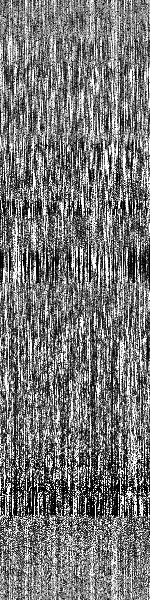

In [99]:
# Reconstruction de l'image issu du produit des facteurs et mise a l'echelle 
# Inserer votre code ici
J=zeros(m,n);
# Fin insertion
J=X*Y;
# Affichage
imhsv =  colorview(Gray,float(J));
tmp = @view imhsv[:,:]

imhsv =  colorview(Gray,float(X));
tmp = @view imhsv[:,:]

**Question 2): ** Répeter les étapes précédentes en faisant varier le rang éstimé des matrices $X$ et $Y$ (variable "erank"). Qu'observez-vous?

**Question 3): ** Donner une interprétation des mises à jour
$X = \max (0,MY'(YY')^+)$
$Y = \max(0,(X'X)^+ X'M )$. Faire tourner un algorithme implantant ces itérations (Xu et al.).



In [22]:
# Inserer votre code ici

# Fin insertion 

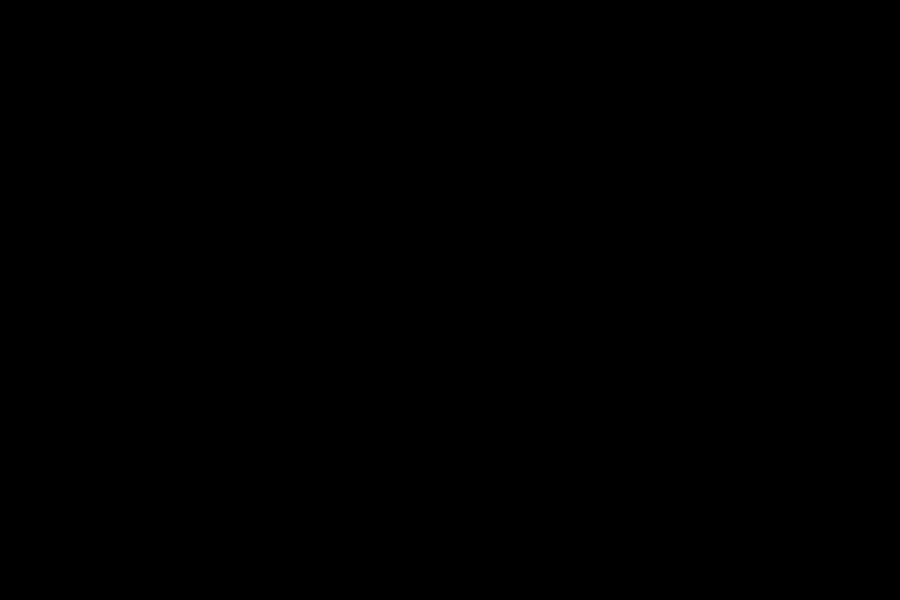

In [7]:
# Reconstruction de l'image et mise a l'echelle 
# Inserer votre code ici
J=zeros(m,n);
# Fin insertion 

# Affichage
imhsv = colorview(Gray,float(J));
tmp=@view imhsv[:,:]

**Question 4): ** Répeter les étapes précédentes en faisant varier le rang éstimé des matrices $X$ et $Y$ (variable "erank"). Qu'observez-vous?